In [10]:
from data_preprocessing import *
from clustering import *
import seaborn as sns

In [11]:
tar_file = "data/period_data.tar"
period_data = load_data(tar_file)
period_data.shape

(4033946, 7)

In [12]:
df_pivot = period_data.copy()
df_pivot = df_pivot.pivot_table(index='xltime', columns='stock', values='price', aggfunc='mean')
df_pivot.index = pd.to_datetime(df_pivot.index)
df_pivot = df_pivot[df_pivot.index.time < datetime.strptime('15:30', '%H:%M').time()]

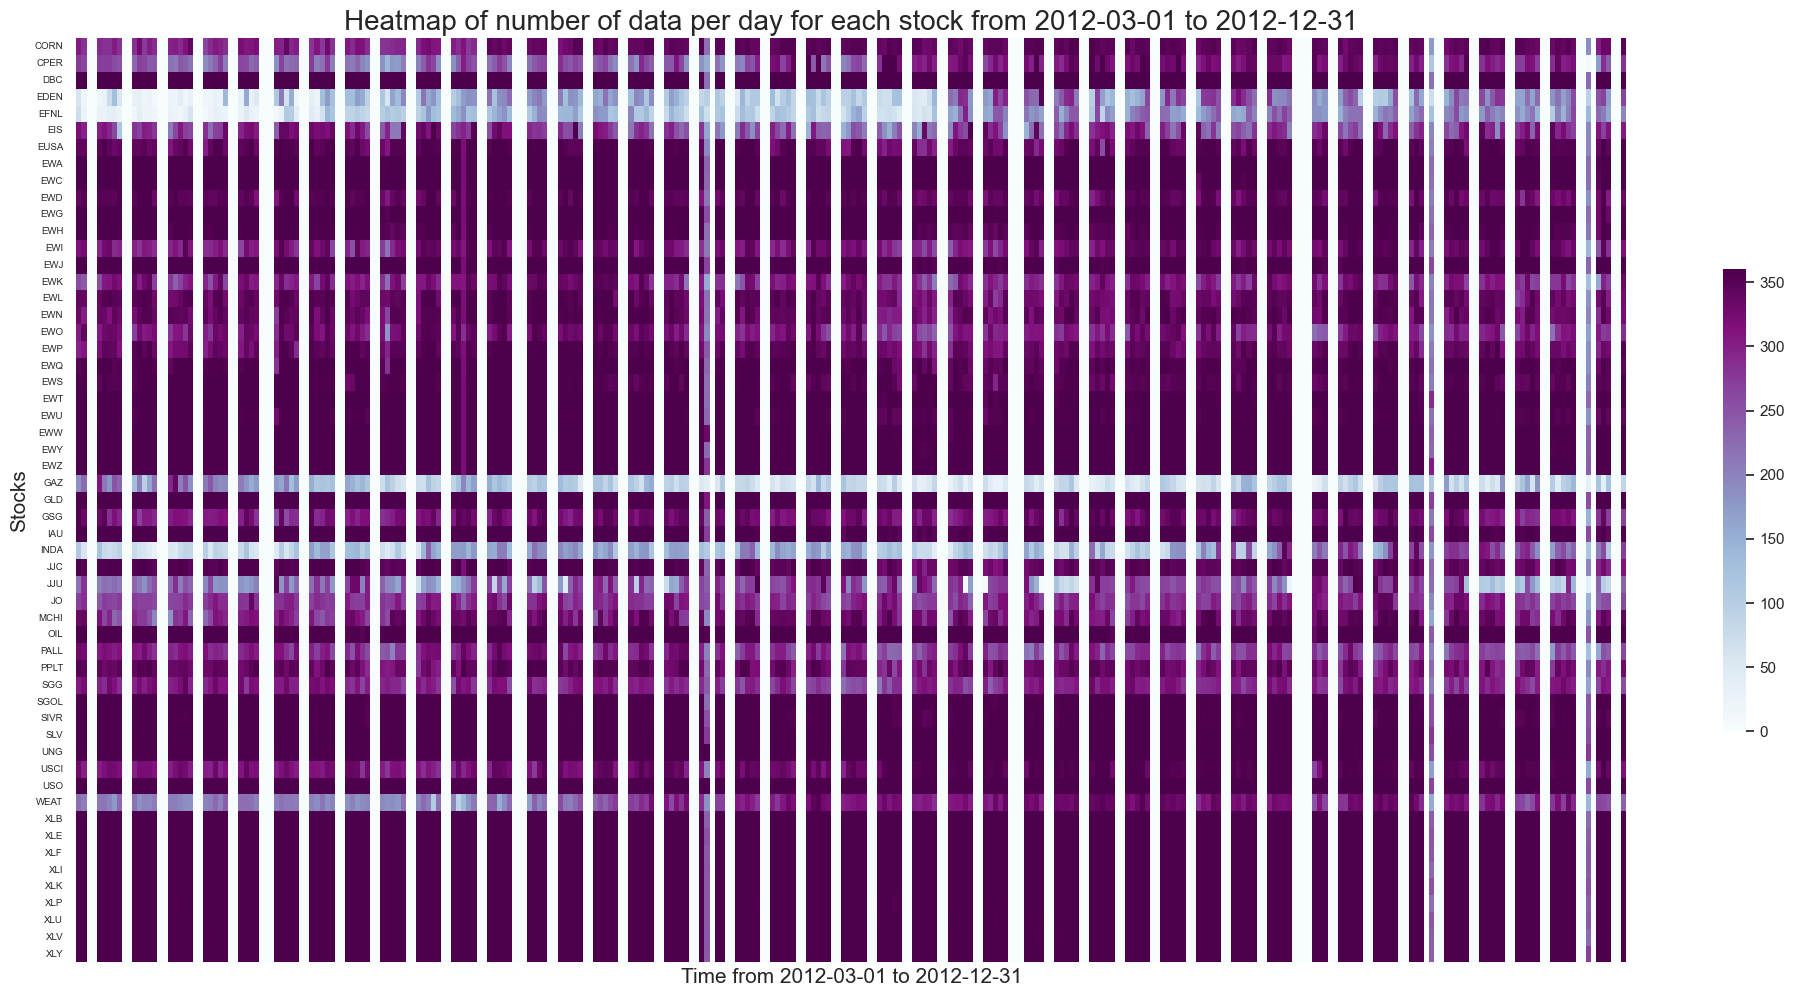

In [13]:
dates = df_pivot.copy()
dates.index = pd.to_datetime(dates.index)
# Get the first and last index (times)
first_time = dates.index.min()
last_time = dates.index.max()

# Extract only the dates in YYYY-MM-DD format
first_date = first_time.date()  # Or first_time.strftime('%Y-%m-%d')
last_date = last_time.date()

# Plot the minutes in each stock for the period
daily_data_count = df_pivot.resample('D').count() 
sns.set(font_scale=1)

pivot_table = daily_data_count.transpose()

plt.figure(figsize=(25, 12))
ax = sns.heatmap(pivot_table, cmap="BuPu", linewidths=0, linecolor=None, cbar_kws={"shrink": .5}, yticklabels=True, xticklabels=False)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)
ax.set_xlabel(f'Time from {first_date} to {last_date}', fontsize=15)
ax.set_ylabel('Stocks', fontsize=15)

plt.title(f'Heatmap of number of data per day for each stock from {first_date} to {last_date}', fontsize=20)

plt.show()

4 stocks seem to have a large amount of missing data : EDEN, EFNL, GAZ and INDA. We will therefore discard them from our dataset. 

In [14]:
stocks_to_remove = ["EDEN", "EFNL", "GAZ", "INDA"]

# Filter out rows where the 'stock' column matches any value in the list
period_data = period_data[~period_data['stock'].isin(stocks_to_remove)]

In [15]:
# For each stock plot the ratio of missing values compared to the total maximum 
missing_min = calculate_ratio_missing_minutes_per_stocks(period_data)

perc_high = len({key: value for key, value in missing_min.items() if value > 25})
print("There are " + str(perc_high) + " stocks with more than 25% missing minutes.")
{key: value for key, value in missing_min.items() if value > 25}

There are 2 stocks with more than 25% missing minutes.


{'JJU': 39.87, 'WEAT': 27.5}

We chose to remove the stocks which have more than 25% missing data, which are JJU and WEAT.

In [16]:
stocks_to_remove = ["JJU", "WEAT"]

# Filter out rows where the 'stock' column matches any value in the list
period_data = period_data[~period_data['stock'].isin(stocks_to_remove)]
period_data.shape

(3798422, 7)

In [17]:
testing = fill_bid_price_by_day_and_stock(period_data)
period_nans = fill_missing_values_by_stock_and_date(testing)
period_nans.shape

(4032254, 7)

In [18]:
parquet_filename = "data/cleaned_data.parquet"
tar_filename = "data/cleaned_data.tar"
save_to_parquet_and_tar(period_nans, parquet_filename, tar_filename)

Saved DataFrame to data/cleaned_data.parquet
Compressed data/cleaned_data.parquet into data/cleaned_data.tar
Removed temporary file: data/cleaned_data.parquet
